In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import folium
import numpy as np
import pandas as pd
import random
import dtale   ## importing D-Tale library

#Configurações de parâmetros do Matplotlib
plt.rcParams['figure.figsize'] = (11, 7)
%matplotlib inline

In [2]:
df = pd.read_csv('Desafio1_imoveis.csv', sep=';')
df

,ID_IMOVEL,ID_BAIRRO,AREA_m2,PRECO
0,1,1,126,827600
1,2,2,129,1111246
2,3,3,92,762763
3,4,1,96,748262
4,5,2,116,841057
5,6,3,99,658592
6,7,3,104,1022486
7,8,3,141,950101
8,9,2,101,1159807
9,10,1,140,1176378


Calcular a média do valor do m2 para cada bairro;
3. Ordenar o resultado de forma decrescente e filtrando apenas os bairros com
IDs iguais a 1 e 3;

In [3]:
df1 = pd.read_csv('Desafio1_nome_bairros.csv', sep=';')
df1

,ID_BAIRRO,NOME_BAIRRO,ATUACAO
0,1,Itaim Bibi,S
1,2,Vila Olimpia,N
2,3,Pinheiros,S
3,4,Vila Madalena,N
4,5,Vila Mariana,N


In [4]:
dfs = pd.merge(df,df1,how='inner',on='ID_BAIRRO')
dfs

,ID_IMOVEL,ID_BAIRRO,AREA_m2,PRECO,NOME_BAIRRO,ATUACAO
0,1,1,126,827600,Itaim Bibi,S
1,4,1,96,748262,Itaim Bibi,S
2,10,1,140,1176378,Itaim Bibi,S
3,11,1,121,861442,Itaim Bibi,S
4,12,1,142,1134910,Itaim Bibi,S
5,14,1,66,762721,Itaim Bibi,S
6,15,1,90,1187119,Itaim Bibi,S
7,2,2,129,1111246,Vila Olimpia,N
8,5,2,116,841057,Vila Olimpia,N
9,9,2,101,1159807,Vila Olimpia,N


In [5]:
dfs['Preco_m2'] = dfs['PRECO']/dfs['AREA_m2']
dfs

,ID_IMOVEL,ID_BAIRRO,AREA_m2,PRECO,NOME_BAIRRO,ATUACAO,Preco_m2
0,1,1,126,827600,Itaim Bibi,S,6568.253968
1,4,1,96,748262,Itaim Bibi,S,7794.395833
2,10,1,140,1176378,Itaim Bibi,S,8402.700000
3,11,1,121,861442,Itaim Bibi,S,7119.355372
4,12,1,142,1134910,Itaim Bibi,S,7992.323944
5,14,1,66,762721,Itaim Bibi,S,11556.378788
6,15,1,90,1187119,Itaim Bibi,S,13190.211111
7,2,2,129,1111246,Vila Olimpia,N,8614.310078
8,5,2,116,841057,Vila Olimpia,N,7250.491379
9,9,2,101,1159807,Vila Olimpia,N,11483.237624


In [6]:
df3 = dfs.loc[dfs['ATUACAO']=='S']

In [7]:
df3.groupby('NOME_BAIRRO').mean()


,ID_IMOVEL,ID_BAIRRO,AREA_m2,PRECO,Preco_m2
NOME_BAIRRO,,,,,
Itaim Bibi,9.571429,1.0,111.571429,956918.857143,8946.231288
Pinheiros,9.333333,3.0,101.166667,878462.333333,9314.016252


In [8]:
valor_medio = df3.sort_values(by='Preco_m2', ascending=False)
valor_medio

,ID_IMOVEL,ID_BAIRRO,AREA_m2,PRECO,NOME_BAIRRO,ATUACAO,Preco_m2
18,13,3,61,1000850,Pinheiros,S,16407.377049
6,15,1,90,1187119,Itaim Bibi,S,13190.211111
5,14,1,66,762721,Itaim Bibi,S,11556.378788
16,7,3,104,1022486,Pinheiros,S,9831.596154
2,10,1,140,1176378,Itaim Bibi,S,8402.700000
14,3,3,92,762763,Pinheiros,S,8290.902174
4,12,1,142,1134910,Itaim Bibi,S,7992.323944
19,19,3,110,875982,Pinheiros,S,7963.472727
1,4,1,96,748262,Itaim Bibi,S,7794.395833
3,11,1,121,861442,Itaim Bibi,S,7119.355372


## DESAFIO 2

In [9]:
d2 = pd.read_csv('Desafio2_input.csv', sep=';')
d2

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,RL,8400,6,1966,Gd,1,3,4,6,0,1,129000
625,626,RM,1533,5,1970,Ex,1,1,2,3,0,0,92000
626,627,RM,3675,5,2005,Gd,1,2,3,5,0,2,145000
627,628,RL,7917,6,1999,Ex,2,3,4,7,1,2,175000


* Como a Área está em formato pé quadrado, vamos transformar para o padrão brasileiro que é o metro quadrado. 

In [10]:
d2['Area_metro'] = d2['Area'] * 0.092903
d2.head()
del d2['Area']

In [11]:
#Verificando se há valores nulos. 
d2.isnull().sum()

Id                      0
Zona                    0
Qualidade               0
AnoConstrucao           0
QualidadeAquecimento    0
Banheiros               0
Quartos_t1              0
Quartos_t2              0
Comodos                 0
Lareiras                0
Garagem                 0
Preco                   0
Area_metro              0
dtype: int64

Excelente, não temos valores nulos para serem tratados. 

In [12]:
d2.describe()

,Id,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,Area_metro
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,5.642289,1974.421304,1.370429,2.651828,3.651828,5.782194,0.515103,1.608903,148234.538951,829.811959
std,181.72094,0.892748,19.189939,0.483304,0.551129,0.551129,1.039936,0.601361,0.577980,28088.037518,308.334423
min,1.00000,4.000000,1940.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,80000.000000,120.773900
25%,158.00000,5.000000,1959.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,129000.000000,689.340260
50%,315.00000,6.000000,1971.000000,1.000000,3.000000,4.000000,6.000000,0.000000,2.000000,147000.000000,836.127000
75%,472.00000,6.000000,1993.000000,2.000000,3.000000,4.000000,6.000000,1.000000,2.000000,173000.000000,978.268590
max,629.00000,8.000000,2009.000000,2.000000,3.000000,4.000000,8.000000,2.000000,3.000000,200000.000000,1848.769700


In [13]:
#Tratar os dados referente ao preço de venda
q11 = d2['Preco'].quantile(q=0.25)
q33 = d2['Preco'].quantile(q=0.75)

amp1 = q33 - q11
lim_max2 = q33 + 1.5 * amp1
lim_min2 = q11 - 1.5 * amp1

amp1 = q33 - q11
lim_max_e1 = q33 + 3 * amp1
lim_min_e1 = q11 - 3 * amp1

print('quartil1:', q11, 'quartil3:', q33)
print('\n')
print('Limite Interno:', lim_max2, lim_min2)
print('\n')
print('Limite Externo:', lim_max_e1, lim_min_e1)

quartil1: 129000.0 quartil3: 173000.0


Limite Interno: 239000.0 63000.0


Limite Externo: 305000.0 -3000.0


* Com base no describe, aparentemente não temos um problema de outlier em nossa base, isso porque os valores do limite interno tanto superiores quanto inferiores não possue na base de dados. 
* Por exemplo, o valor de venda superior interno é de 239000.0, enquanto que na nossa base de dados, o valor máximo é de 200000. O mesmo vale para o limite inferior, que foi de 63000, enquanto que na nossa base de dados, o valor mínimo é de 80000. Com base nesse tratamento de outliers, não vamos fazer nenhum processamento nesse sentido. 

In [14]:
d2['Aquecimento'] = d2.QualidadeAquecimento.map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})
d2['Zona'] = d2.Zona.map({'RL': 0, 'RM': 1})

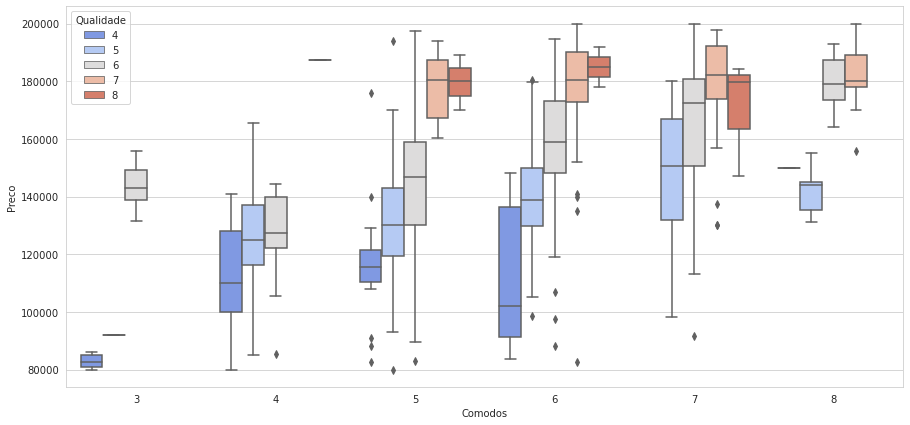

In [15]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Comodos',y='Preco',data=d2,palette='coolwarm', hue='Qualidade')

* Com base nesse gráfico de boxplot, podemos perceber que materiais de qualidade mais baixa (4 e 5) estão presentes em todas os imóveis. Imóveis com 8 comodos, possuí pouco material de baixa qualidade ou acabamento, além do fato desses apartamentos serem maiores, influenciam no fato de serem mais caros. 
* Apartamento menores de 3, 4 e 5 comodos são em tese mais baratos pois além de menores, são utilizados materiais e acabamentos de pouca qualidade, o que faz baraterar o custo de construção. 
* Apartamento de 5 e 6 quartos tem uma mediana muito próximo dos apartamentos com 8 comodos e de qualidade superior. Neste caso, vale mais a pena comprar um apartamento com 8 comodos, já que a diferença cem relação aos apartamentos com 5 e 6 cômodos é muito próximo. 

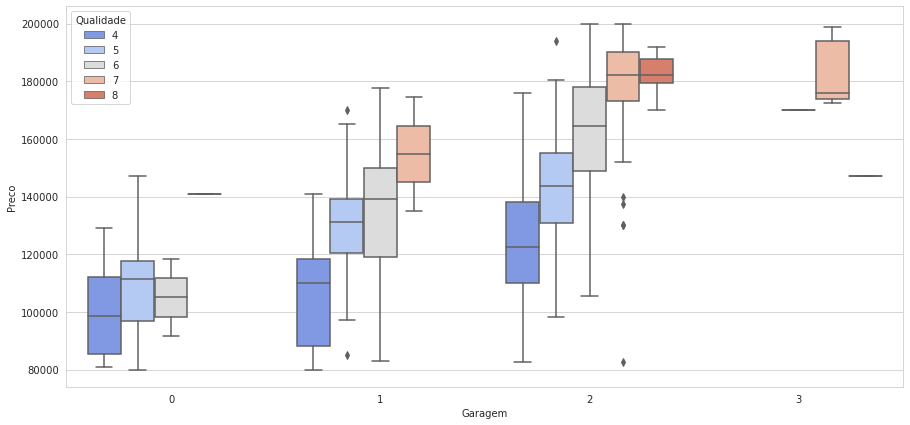

In [16]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Garagem',y='Preco',data=d2,palette='coolwarm', hue='Qualidade')

* Com base nesse boxplot, podemos afirmar que apartamentos com poucos comodos não possuí nenhuma vaga de garagem. Já os apartamentos com mais comodo, possui pelo menos 1 vagas de garagem, podendo chegar até 3 vagas. 

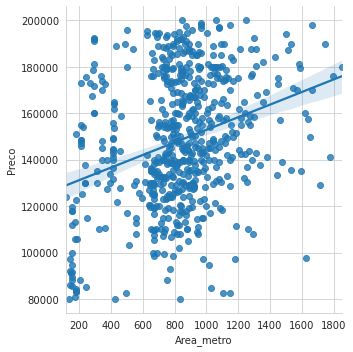

In [17]:
sns.lmplot(x='Area_metro',y='Preco', data=d2)

Com base no gráfico de Area em metro quadrado relacionado por preço, podemos identificar que há uma concentração maior de pontos entre 600 a 1200 metros quadrados. 
Apartamentos de até 200 metros quadrados tem seu preço variando entre 80 a 120 mil reais. 

Se eu estivesse procurando por um apartamento, certamente focaria nos apartamentos abaixo da linha de tendência. Isso indica que nesse ponto há apartamentos com ótimas oportunidades. 
Porém podemos ter probelmas de outliers, sobretudo no campo Area. Pois existem apartamentos com 800, 1000 até 1200 metros quadrados custando 80000. Tudo indica que são outliers, mas caso não sejam, é uma excelente oportunidade de compra. 

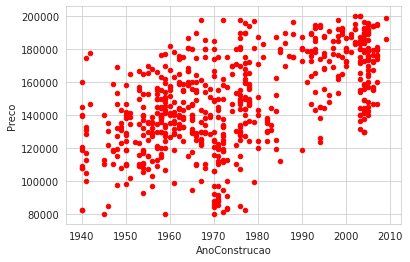

In [18]:
d2.plot(x='AnoConstrucao',y='Preco',kind='scatter',color='r')

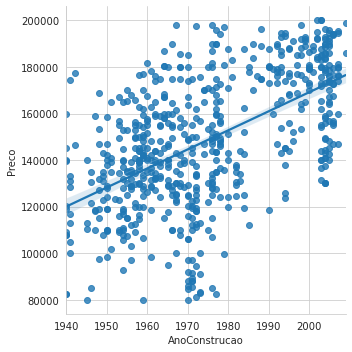

In [19]:
sns.lmplot(x='AnoConstrucao',y='Preco', data=d2)

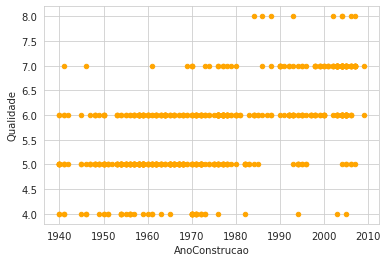

In [20]:
d2.plot(x='AnoConstrucao',y='Qualidade',kind='scatter',color='orange')

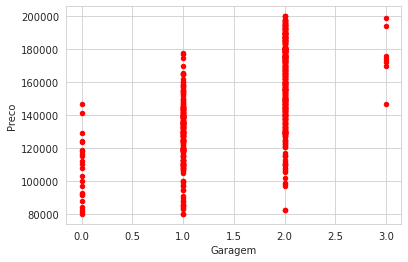

In [21]:
d2.plot(x='Garagem',y='Preco',kind='scatter',color='r')

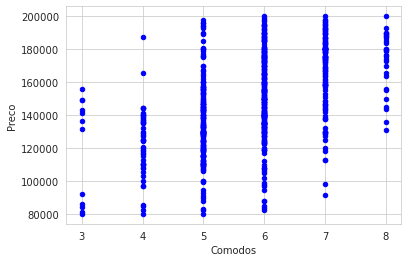

In [22]:
d2.plot(x='Comodos',y='Preco',kind='scatter',color='b')

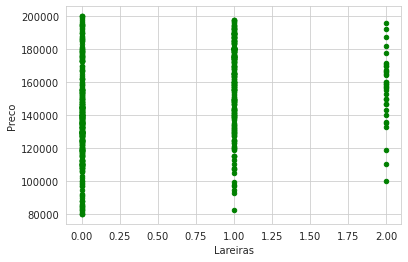

In [23]:
d2.plot(x='Lareiras',y='Preco',kind='scatter',color='g')

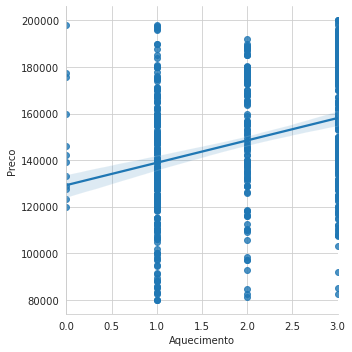

In [24]:
sns.lmplot(x='Aquecimento',y='Preco', data=d2)

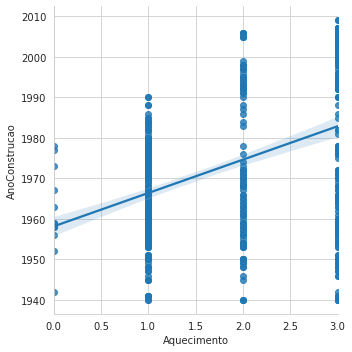

In [25]:
sns.lmplot(x='Aquecimento',y='AnoConstrucao', data=d2)

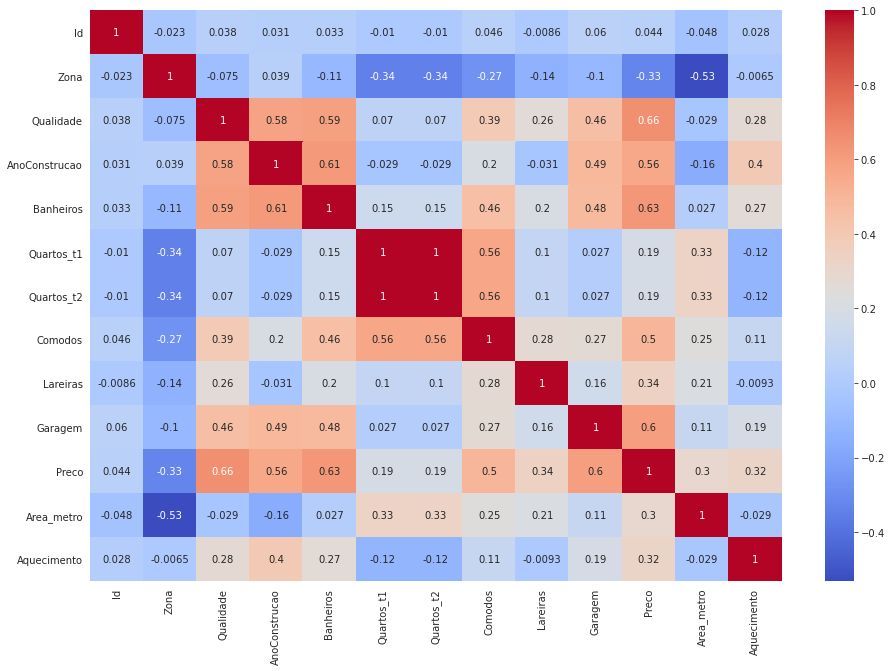

In [27]:
sns.heatmap(d2.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (15.5, 10.5)

In [28]:
#Tratar os dados referente ao preço de venda
q11 = d2['Area_metro'].quantile(q=0.25)
q33 = d2['Area_metro'].quantile(q=0.75)

amp1 = q33 - q11
lim_max2 = q33 + 1.5 * amp1
lim_min2 = q11 - 1.5 * amp1

amp1 = q33 - q11
lim_max_e1 = q33 + 3 * amp1
lim_min_e1 = q11 - 3 * amp1

print('quartil1:', q11, 'quartil3:', q33)
print('\n')
print('Limite Interno:', lim_max2, lim_min2)
print('\n')
print('Limite Externo:', lim_max_e1, lim_min_e1)

quartil1: 689.34026 quartil3: 978.26859


Limite Interno: 1411.6610850000002 255.94776499999983


Limite Externo: 1845.0535800000002 -177.44473000000028


Na nossa base, há um indicativo de que imóveis acima de 1411 metros quadrados e imóveis abaixo de 255.94 metros quadrados sejam outliers. Porém os dados de limite externo, nos mostra que valores acima de 1845 são outliers. Vamos pesquisar mais a respeito desses valores. 

In [29]:
d2[d2['Area_metro']>1411]

,Id,Zona,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,Area_metro,Aquecimento
17,18,0,5,1959,Gd,1,2,3,5,2,1,170000,1570.525215,2
28,29,0,7,1970,TA,2,3,4,7,1,2,180000,1848.769700,1
56,57,0,6,1979,TA,2,3,4,7,1,2,181000,1583.345829,1
116,117,0,6,1962,TA,1,3,4,6,1,2,176000,1792.656288,1
124,125,0,4,1951,Ex,1,2,3,4,0,2,141000,1777.977614,3
134,135,0,5,1953,TA,1,2,3,5,2,1,157000,1463.222250,1
147,148,0,6,1960,Ex,2,3,4,6,2,2,157500,1635.092800,3
158,159,0,6,1976,TA,2,3,4,6,1,2,190000,1746.576400,1
194,195,0,6,1966,Ex,2,2,3,6,1,2,190000,1532.156276,3
213,214,0,6,2006,Gd,2,3,4,8,0,2,172785,1447.242934,2


In [30]:
from pycaret.regression import *

In [31]:
d2['Aquecimento'] = d2['Aquecimento'].astype(float)
d2['Qualidade'] = d2['Qualidade'].astype(float)
d2['Zona'] = d2['Zona'].astype(float)
d2['AnoConstrucao'] = d2['AnoConstrucao'].astype(float)
d2['Banheiros'] = d2['Banheiros'].astype(float)
d2['Comodos'] = d2['Comodos'].astype(float)
d2['Lareiras'] = d2['Lareiras'].astype(float)
d2['Garagem'] = d2['Garagem'].astype(float)
d2['Preco'] = d2['Preco'].astype(float)
d2['Quartos_t1'] = d2['Quartos_t1'].astype(float)
d2['Quartos_t2'] = d2['Quartos_t2'].astype(float)

In [32]:
mod = d2[['Zona', 'Qualidade', 'Banheiros', 'Comodos', 'Lareiras', 'Garagem', 'Area_metro', 'Quartos_t1', 'Quartos_t2', 'Aquecimento', 'Preco']]

In [33]:
d2.columns

Index(['Id', 'Zona', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento',
       'Banheiros', 'Quartos_t1', 'Quartos_t2', 'Comodos', 'Lareiras',
       'Garagem', 'Preco', 'Area_metro', 'Aquecimento'],
      dtype='object')

In [34]:
mod

,Zona,Qualidade,Banheiros,Comodos,Lareiras,Garagem,Area_metro,Quartos_t1,Quartos_t2,Aquecimento,Preco
0,0.0,6.0,2.0,6.0,1.0,2.0,891.868800,3.0,4.0,3.0,181500.0
1,0.0,5.0,1.0,5.0,0.0,2.0,1311.325845,1.0,2.0,3.0,143000.0
2,0.0,5.0,1.0,5.0,0.0,1.0,1040.513600,3.0,4.0,3.0,129500.0
3,0.0,5.0,1.0,4.0,0.0,1.0,1204.766104,2.0,3.0,1.0,144000.0
4,0.0,6.0,1.0,5.0,1.0,1.0,1014.500760,2.0,3.0,1.0,157000.0
...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,6.0,1.0,6.0,0.0,1.0,780.385200,3.0,4.0,2.0,129000.0
625,1.0,5.0,1.0,3.0,0.0,0.0,142.420299,1.0,2.0,3.0,92000.0
626,1.0,5.0,1.0,5.0,0.0,2.0,341.418525,2.0,3.0,2.0,145000.0
627,0.0,6.0,2.0,7.0,1.0,2.0,735.513051,3.0,4.0,3.0,175000.0


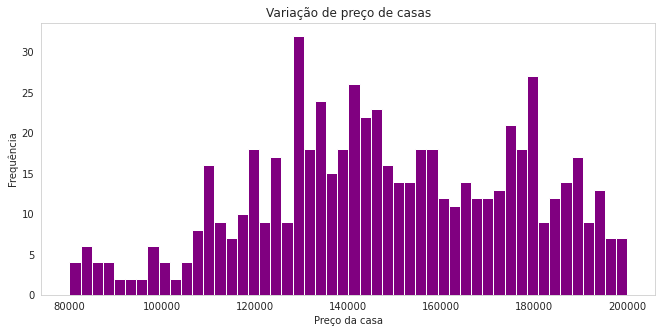

In [35]:
#Criando gráfico de histograma
plt.figure(figsize=(11, 5))
plt.hist(mod['Preco'], bins=50, color = 'purple')
plt.grid()
plt.xlabel('Preço da casa')
plt.ylabel('Frequência')
plt.title('Variação de preço de casas')
plt.show()


In [36]:
#Dividindo dados para geração do conjunto de teste e treino
y = mod['Preco']
#Retirando coluna de preço, o qual queremos prever no conjunto teste
X = mod.drop(['Preco'], axis=1)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [38]:
mod.head()

,Zona,Qualidade,Banheiros,Comodos,Lareiras,Garagem,Area_metro,Quartos_t1,Quartos_t2,Aquecimento,Preco
0,0.0,6.0,2.0,6.0,1.0,2.0,891.868800,3.0,4.0,3.0,181500.0
1,0.0,5.0,1.0,5.0,0.0,2.0,1311.325845,1.0,2.0,3.0,143000.0
2,0.0,5.0,1.0,5.0,0.0,1.0,1040.513600,3.0,4.0,3.0,129500.0
3,0.0,5.0,1.0,4.0,0.0,1.0,1204.766104,2.0,3.0,1.0,144000.0
4,0.0,6.0,1.0,5.0,1.0,1.0,1014.500760,2.0,3.0,1.0,157000.0


In [39]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preco   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.58e-155
Time:                        17:49:25   Log-Likelihood:                -6956.6
No. Observations:                 629   AIC:                         1.393e+04
Df Residuals:                     619   BIC:                         1.398e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.454e+04   3972.710      3.660      0.000    6737.221    2.23e+04
Zona        -1.113e+04   2327.614     -4.782      0.000   -1.57e+04   -6558.583
Qualidade    9984.2547    929.496     10.742      0.000    8158.907    1.18e+04
Banheiros    1.166e+04   1743.710      6.689      0.000    8238.857    1.51e+04
Comodos      3079.9013    851.539      3.617      0.000    1407.645    4752.157
Lareiras     4416.7359   1117.491      3.952      0.000    2222.203    6611.269
Garagem       1.24e+04   1278.188      9.703      0.000    9891.762    1.49e+04
Area_metro     15.3841      2.494      6.169      0.000      10.487      20.281
Quartos_t1  -7953.5008   2402.772     -3.310      0.001   -1.27e+04   -3234.927
Quartos_t2   6585.3437   1793.156      3.672      0.000    3063.937    1.01e+04
Aquecimento  3505.4171    712.601      4.919      0.000    2106.009    4904.825
==============================================================================
Omnibus:                      126.637   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.603
Skew:                          -0.963   Prob(JB):                     8.29e-84
Kurtosis:                       6.299   Cond. No.                     1.69e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
#Criando conjunto de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 27)

In [41]:
#Geração do modelo
modelo = LinearRegression().fit(X_train, y_train)

In [42]:
#Score no conjunto de treino
modelo.score(X_train, y_train)

0.6948923106552041

In [43]:
#Score no conjunto de teste
modelo.score(X_test, y_test)

0.6985903574139829

Tanto os dados de treino, quanto os dados de teste resultaram em um score de 0.69. Isso indica que não encontramos problemas de overfitting ou underfitting no nosso modelo. 

In [44]:
predictions = modelo.predict( X_test)

Text(0, 0.5, 'Predicted Y')

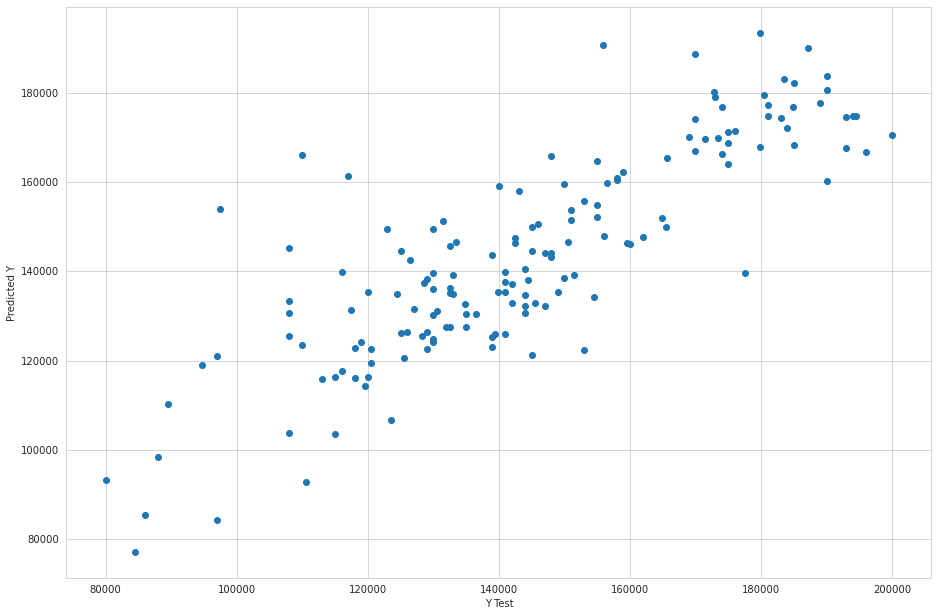

In [45]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10710.396022463266
MSE: 216013575.46271762
RMSE: 14697.400296063166


* A métrica MAE, é utilizada em conjunto com o RMSE, para identificarmos se há outliers em nossa base. Se o RMSE for 2 vezes o valor do MAE, isso indica que há outliers na base de dados. Como o RMSE obteve aproximadamente 1.4 vezes o valor do MAE, então não há indicativo de outlier em nossa base. 
* O RMSE é uma métrica muito utilizada, que resumidamente, significa a diferença dos valores preditos em relação a base real. Quanto menor o valor, melhor é o modelo. Com base nessa base, a diferença dos valores preditos em relação aos valores reais é de R$14697.40 reais. 

In [47]:
print('Coefficients: \n', modelo.coef_)

Coefficients: 
 [    0.         -9747.57036941  9740.12847943 11081.87234474
  2712.75867724  4216.24682387 13049.52162896    18.47255373
   -92.10230617   -92.10230617  4168.64330728]


In [48]:
coeffecients = pd.DataFrame(modelo.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
const,0.000000
Zona,-9747.570369
Qualidade,9740.128479
Banheiros,11081.872345
Comodos,2712.758677
Lareiras,4216.246824
Garagem,13049.521629
Area_metro,18.472554
Quartos_t1,-92.102306
Quartos_t2,-92.102306


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média da Zona aonde o imóvel está localizado, está associado a uma queda de 9747.57 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidadades na qualidade do imóvel está associado a um aumento de 9740.12 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de banheiro no imóvel está associado a um aumento de 11081.87 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de comodos no imóvel está associado a um aumento de 2712.75 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de lareira no imóvel está associado a um aumento de 4216.24 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de garagem no imóvel está associado a um aumento de 13049.52 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de metro quadrado no imóvel está associado a um aumento de 18.47 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de quartos tipo 1 no imóvel está associado a uma queda de 92.10 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de quartos tipo 2 no imóvel está associado a uma queda de 92.10 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tipo de aquecimento no imóvel está associado a um aumento de 4168.64 reais no preço total do imóvel.

In [49]:
#Tentando melhorar o modelo
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = numero)
    modelos = LinearRegression().fit(X_train, y_train)
    
    precisao_conjunto_treino.append(modelos.score(X_train, y_train))
    precisao_conjunto_teste.append(modelos.score(X_test, y_test))


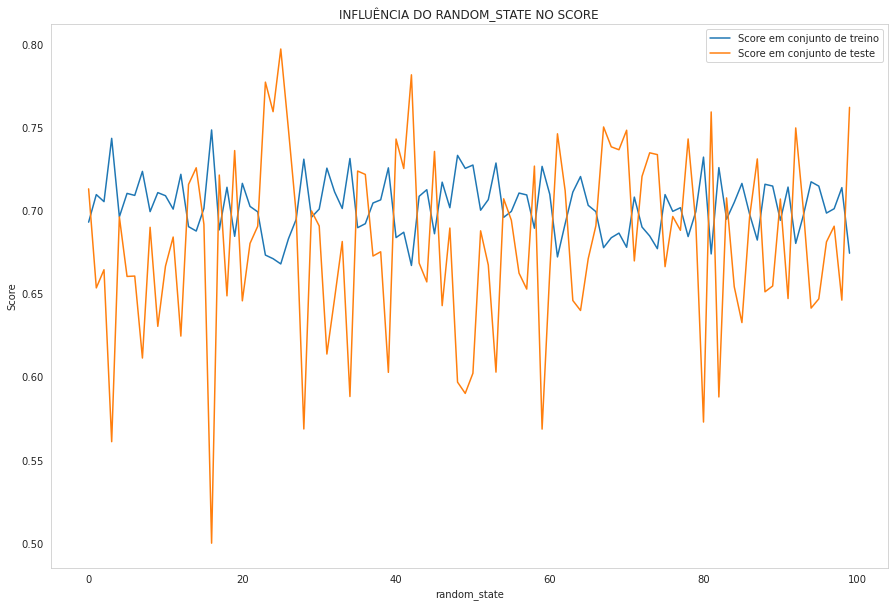

In [50]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [51]:
#Armazenando em uma variável o melhor random_state e seu score
melhor_random_state = precisao_conjunto_teste.index(max(precisao_conjunto_teste))
melhor_score = max(precisao_conjunto_teste)

print('O melhor random_state é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state é: 25; que gera um score de: 0.7974895216425401


In [52]:
#Mostrando valor sugerido de uma casa aleatória
preco_sugerido = modelo.predict(X_test)

print('Preço sugerido de venda: R$ {:0,.0f}'.format(int(preco_sugerido[random.randint(0, 100)])))

Preço sugerido de venda: R$ 158,013


In [53]:
#Treinando modelo com novos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = melhor_random_state)
modelos = LinearRegression().fit(X_train, y_train)

In [54]:
#Score no conjunto de treino
modelos.score(X_train, y_train)

0.6681181223776107

In [55]:
#Score no conjunto de teste
modelos.score(X_test, y_test)

0.7974895216425401

In [56]:
predictions = modelos.predict(X_test)


Text(0.5, 1.0, 'Teste vs Predições')

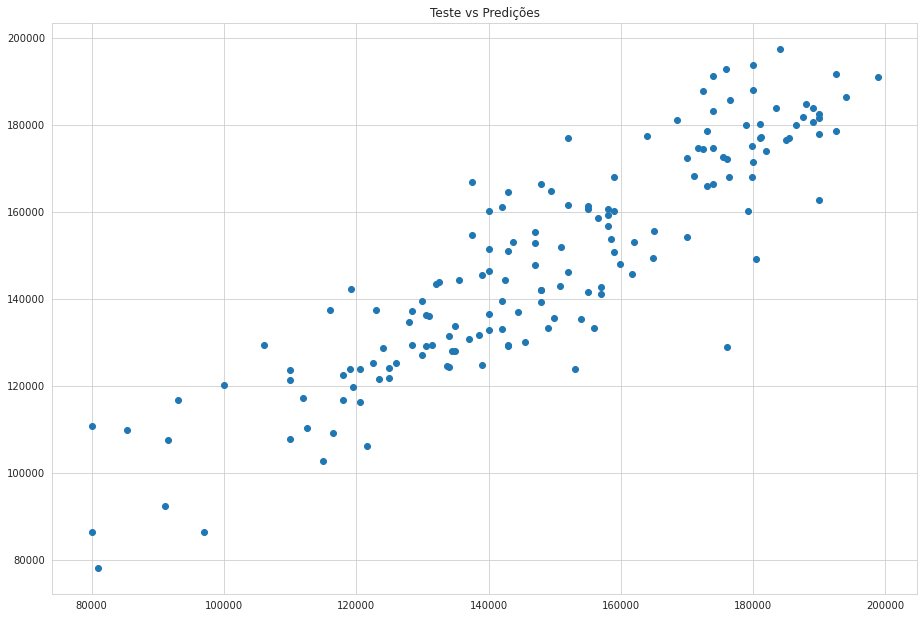

In [57]:
plt.scatter(y_test,predictions)
plt.title('Teste vs Predições')

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9553.041553547044
MSE: 149656960.99542072
RMSE: 12233.436189207869


## Interpretando o resultado dos nossos coeficientes do modelo



In [59]:
coeffecients = pd.DataFrame(modelos.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
const,0.000000
Zona,-11188.559897
Qualidade,10516.424247
Banheiros,11914.693906
Comodos,3794.179343
Lareiras,3783.367203
Garagem,11851.611093
Area_metro,14.758981
Quartos_t1,-847.572138
Quartos_t2,-847.572138


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média da Zona aonde o imóvel está localizado, está associado a uma queda de 11188.56 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidadades na qualidade do imóvel está associado a um aumento de 10516.42 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de banheiro no imóvel está associado a um aumento de 11914.69 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de comodos no imóvel está associado a um aumento de 3783.36 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de lareira no imóvel está associado a um aumento de 3783.36 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de garagem no imóvel está associado a um aumento de 11851.61 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de metro quadrado no imóvel está associado a um aumento de 14.75 reais no preço total.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de quartos tipo 1 no imóvel está associado a uma queda de 847.57 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade de quartos tipo 2 no imóvel está associado a uma queda de 847.57 reais no preço total do imóvel.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tipo de aquecimento no imóvel está associado a um aumento de 3036.02 reais no preço total do imóvel.

## O que significa em termos de negócio os valores do coeficientes do modelo

**Traduzindo esses valores de coeficiente estatístico, para a linguagem de négocio siginifica que:**

* Construir imóveis em zona de baixa densidade é mais rentável do que em zonas de média densidade;
* Quanto maior a qualidade do material e acabamento do apartamento, maior é o preço. Significa que a cada 1 ponto adicional na qualidade do material e acabamento, o imóvel tem um adicional de 10516.42 reais no preço final;
* Apartamento com banheiros adicionais tem um adicional de 11914.693906 reais no preço final; 
* A cada comodo adicional no apartamento, o preço adicionado é de 3794.17 reais; 
* Apartamentos com lareiras, tem um adicional de 3783.36 reais no preço final por lareira. 
* A cada garagem adicional nos apartamentos, o preço adicional no valor do apartamento é de 11851.61 reais; 
* A cada 1 metro quadrado adicional, o preço do imóvel em média terá um adiconal de 14.75 reais;
* Os quartos do tipo 1 e tipo 2, obtiveram os mesmos resultados. A cada quarto adicional no apartamento, há uma queda de 847.57 reais no preço final do imóvel;
* Quanto maior a qualidade do sistema de aquecimento, tende a adicionar um valor de 3036.02 reais. Para ter uma ideia, a diferença no preço total do imóvel com o melhor aquecimento em relação ao pior sistema, pode chegar a 9108.06 reais. 


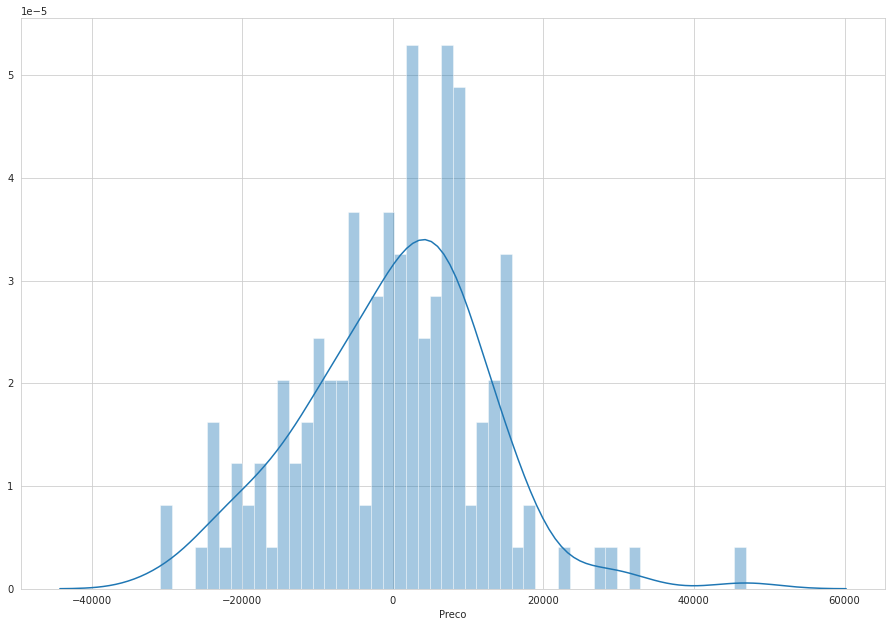

In [60]:
sns.distplot((y_test-predictions),bins=50);

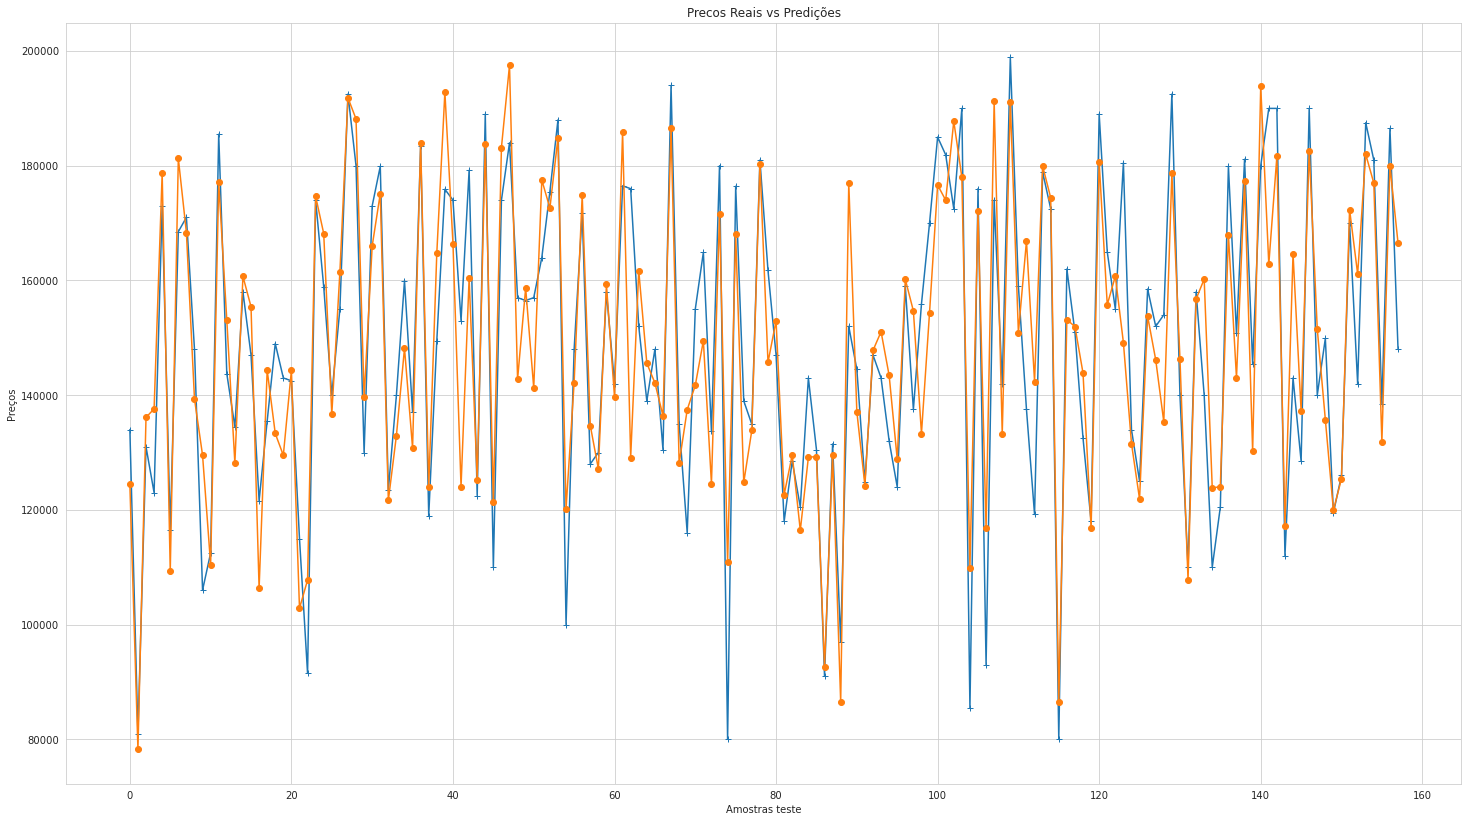

In [61]:
plt.figure(figsize=(25,14))

plt.xlabel('Amostras teste')
plt.ylabel('Preços')
plt.title('Precos Reais vs Predições')


plt.plot(range(0, y_test.shape[0]), y_test, marker='+')
plt.plot(range(0, predictions.shape[0]), predictions, marker='o');

Com base nesse gráfico acima referente as amostras de teste, nosso modelo ainda apresenta certa dificuldade para prever preços de imóveis abaixo de 100 mil reais por exemplo. Porém conseguimos reduzir o nosso **RMSE** de **14697.40 para 12233.43**, o que significa uma **redução de 16.76%**

In [62]:
import pickle
import joblib

In [63]:
joblib.dump(modelos, 'model_rl.pkl')

['model_rl.pkl']

In [64]:
X_train.head()

,const,Zona,Qualidade,Banheiros,Comodos,Lareiras,Garagem,Area_metro,Quartos_t1,Quartos_t2,Aquecimento
61,1.0,0.0,5.0,2.0,7.0,1.0,2.0,960.152505,3.0,4.0,2.0
341,1.0,0.0,6.0,1.0,7.0,1.0,2.0,761.525891,3.0,4.0,3.0
104,1.0,1.0,6.0,1.0,5.0,0.0,1.0,156.077040,2.0,3.0,1.0
508,1.0,0.0,5.0,1.0,6.0,2.0,2.0,1649.492765,3.0,4.0,1.0
140,1.0,0.0,7.0,2.0,6.0,2.0,2.0,1311.325845,3.0,4.0,1.0


In [70]:
X_train.to_csv('teste.csv')

In [65]:
model = joblib.load('model_rl.pkl')

In [71]:
pickle_out = open("lr.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

### Testando a nossa API do modelo

Vamos simular o preço sugerido do apartamento de acordo com as seguintes descrições:

* Zona de Baixa Densidade;
* Qualidade 6
* 1 Banheiro
* 7 comodos
* Nenhuma lareira
* 2 vagas de garagem
* 900 m²
* 2 quartos tipo 1
* 2 quartos tipo 2
* Aquecimento mediano. 

In [66]:
teste = np.array([[1.0,0.0,6.0,1.0,7.0,0.0,2.0,900.15,2.0,2.0,2.0]])

In [67]:
model.predict(teste)

array([159212.18765875])

**Agora vamos simular um segundo imóvel**

* Zona de Baixa Densidade;
* Qualidade 8
* 2 Banheiro
* 9 comodos
* 1 lareira
* 3 vagas de garagem
* 900 m²
* 1 quartos tipo 1
* 2 quartos tipo 2
* Aquecimento excelente. 


In [68]:
teste = np.array([[1.0,0.0,8.0,2.0,9.0,1.0,3.0,900.00,1.0,2.0,3.0]])

In [69]:
model.predict(teste)

array([219264.45417774])

Na cosntrução do modelo, foi utilizado a biblioteca **Pycaret**, ara auxiliar na abordagem de qual(is) modelo(s) que seriam utilizados. Os modelos de regressão linear tiveram bons resultados. Porém como tive alguns problemas em relação a overfitting dos modelos, decidi construir o modelo com a biblioteca **sklearn**. 

A construção do modelo segue em linha téorica, o padrão encontrado na parte de exploração dos dados com os seus gráficos. 

In [ ]:
exp_name = setup(data = mod,  target = 'Preco', session_id=28, train_size=0.3, remove_outliers=True, remove_multicollinearity=True)

In [ ]:
best = compare_models()

In [ ]:
model = create_model('rf', fold=10)

In [ ]:
tuned1 = tune_model(model,choose_better=True)

In [ ]:
tuned2 = tune_model(model, n_iter = 40)

In [ ]:
plot_model(tuned1)

In [ ]:
plot_model(model, plot='feature')

In [ ]:
plot_model(model, plot='error')

In [ ]:
plot_model(gbr, plot='cooks')


In [ ]:
plot_model(gbr, plot='rfe')

In [ ]:
plot_model(gbr, plot='vc')

In [ ]:
mod_pred_holdout = predict_model(gbr)

In [ ]:
mod_pred_holdout